# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 12: Statistical Hypothesis Testing ($\chi^2$ test + t-test). The Central Limit Theorem. Covariance and Correlation.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(seed=1023)

## 1. $\chi^2$ Distribution and the Related Test

Observe $k$ random variables $X_1, X_2, \ldots, X_k$ which are independent from one another and follow the same Standard Normal Distribution ($\mathcal{N}(0,1)$). Such RVs - which are independent and have the same distribution are called *independent and identically distributed* or *IID*. So, let our IID random variables $X_1, X_2, \ldots, X_k$ all have $\mathcal{N}(0,1)$ distribution. If we square those RVs and sum up those squares we obtain a new random variable $X$:

$$X = X_1^2 + X_2^2 + \cdot + X_k^2.$$


This new RV $X$ has *Chi-Squared Distribution* with $k$ *degrees of freedom*, which is denoted by $\chi^2_k$. So, $\chi^2_k$ is a continuous-type distribution with a single parameter $k$. 



Let's now plot p.d.f and c.d.f of $\chi^2_k$ by sampling. We sample by using `rng.chisquare()` and `df` argument for the degrees of freedom. 

We'll sample from $\chi^2_3$

In [2]:
def sample_from_chisquare(df, sample_size=10**3):
    
    fig, ax = plt.subplots(3, 1, figsize=(24, 18))
    
    sample = rng.chisquare(df=df, size=sample_size)
    
    sns.histplot(ax=ax[0], x=sample, bins=100, stat='density')
    sns.histplot(ax=ax[1], x=sample, bins=100, stat='probability')
    sns.histplot(ax=ax[2], x=sample, bins=100, stat='probability', cumulative=True)
    
    ax[0].set_xticks(np.arange(0, sample.max(), 1))
    ax[1].set_xticks(np.arange(0, sample.max(), 1))
    ax[2].set_xticks(np.arange(0, sample.max(), 1))
    
    ax[1].set_yticks(np.arange(0, 1.2, .2))
    
    ax[2].set_ylabel('Cumulative Probability')

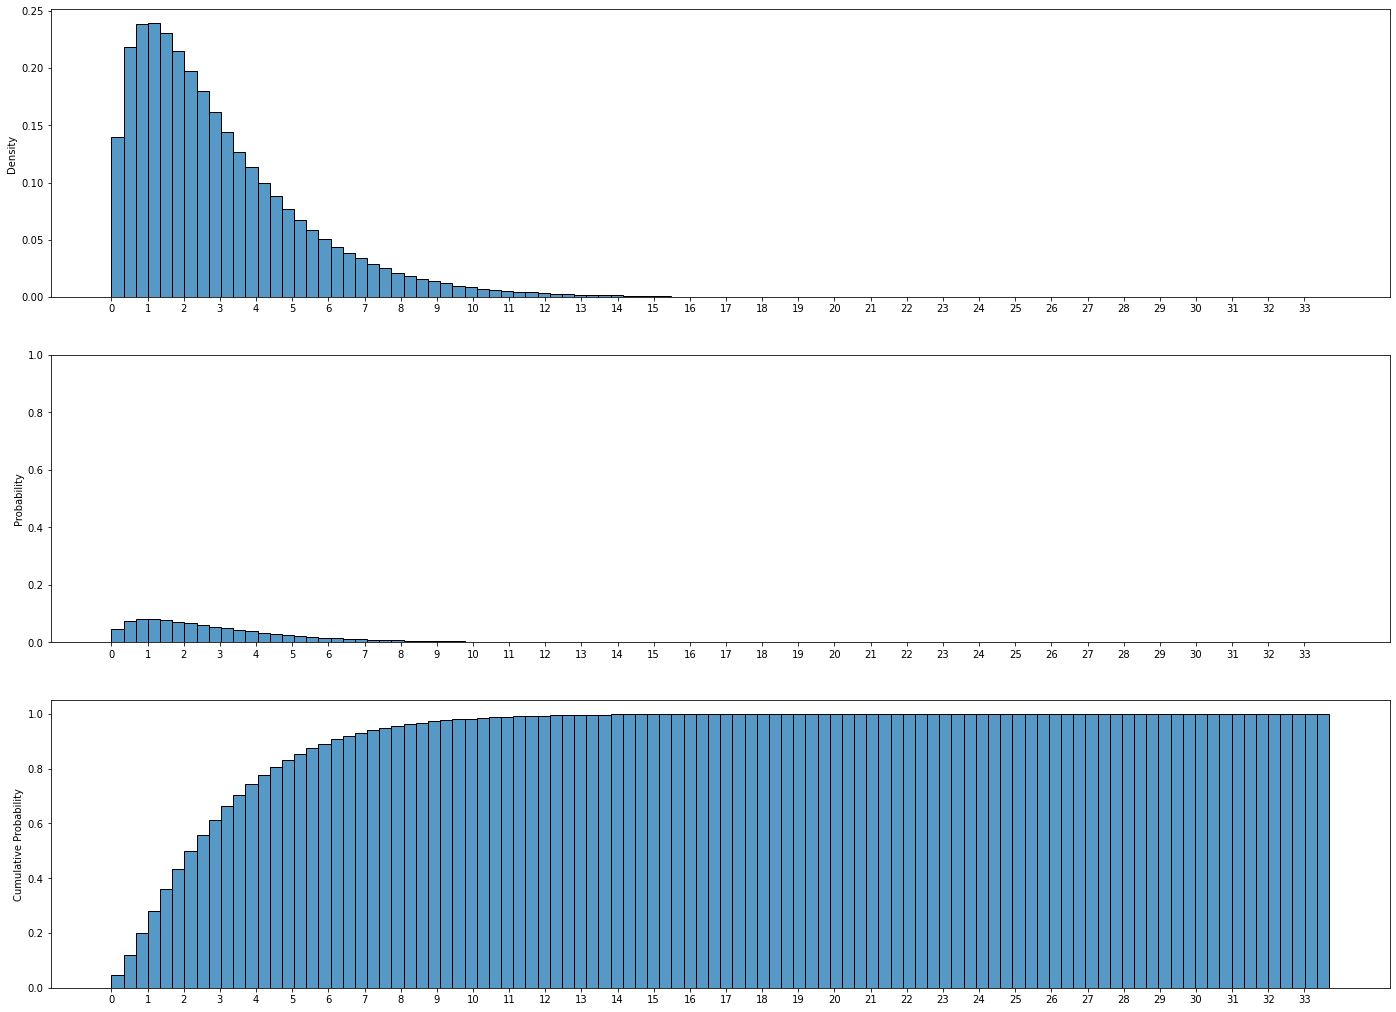

In [3]:
sample_from_chisquare(df=3, sample_size=10**6)

Formally, the formula for p.d.f for $\chi^2_k$ is given by

$$\varphi(x;k) = 
\begin{cases}
2\frac{x^{(k/2 - 1)e^{-x/2}}}{2^{k/2}\Gamma\big(\frac{k}{2}\big)}\quad x > 0,\\
\\
0,\quad x \leqslant 0,
\end{cases}
$$

where $\Gamma$ is the *gamma function* for which $\Gamma(n) = (n-1)!$ for every positive integer $n$. 

This formula might induce a headache, and the formula for c.d.f of $\chi^2_k$ is even heavier, as it involves *lower incomplete gamma function*; yeah, I know. We won't even write it. But worry not - there are corresponding statistical tables to find values for these nerve-wracking formulas. 

***

Let's get back to the plots for p.d.f and c.d.f of $\chi^2_k$. We see there that a RV $X\sim\chi^2_k$ can take various positive values in the support of $\chi^2_k$, but what do those values mean? 

To see this, let's draw a sample from a population with an assumed distribution. Every member of the sample can take one $k$ values, i.e. *categories*. We count those values, for each category. Based on the observed values in the sample we can make a *hypothesis* whether the sample's distribution follows the assumed distribution of the population. Now we wonder how valid our hypothesis is? To see that, we need somehow to compare *observed counts* obtained from the sample, and *expected counts* which are expected from the distribution of the population. By comparing them, we want to see how they deviate from one another, i.e. to see how much sample deviates from the distribution of the population. As a measure of this deviation we introduce $\chi^2$ *statistic* computed by

$$\chi^2 = \sum_{i=1}^k\frac{({\rm Observed\ Counts}_i - {\rm Expected\ Counts}_i)^2}{{\rm Expected\ Counts}_i}.$$

Noticing that we are having sum of squares again? These deviations are stochastic, and their values/probabilities distribute according to $\chi^2$ distribution. We use computed $\chi^2$ value to perform *chi-square test* and see if the distribution of the sample and the distribution of the population are the same. This is the *Null Hypothesis* of the test. The alternative hypothesis, is of course, that they are different.

***

We illustrate how to perform chi-square test using the following example:

*An urn contains white, blue, and red balls in proportion of 5:3:2. We draw from the urn a sample of size $n=100$ and obtain a sample with 47 white, 31 blue and 22 red balls. Can we say that the sample follwos the same distribution as the balls in the urn?*

The distribution of the population in the urn is called *Multinomial Distribution*. It is a discrete-type distribution, and it is a generalization of the Binomial Distribution. Whereas in Binomial Distribution every repetition of experiment has a binary 'yes/no' outcome, in Multinomial Distribution every repetition has three or more outcomes, each with given probability. 

So, we want to check whether the drawn sample is distributed according to Multinomial Distribution. To do this, we utilize $\chi^2$ test. First, we need to calculate expected counts. Obviously, they are 50, 30 and 20 for white, blue and red balls, respectively. Observed counts given from the sample. Now we compute $\chi^2$ statistic:

$$\chi^2 = \frac{(47 -50)^2}{50} + \frac{(31 - 30)^2}{30} + \frac{(22 - 20)^2}{20} = 0.41333... .$$ 

Now we want to check whether the following holds:

$$P(X \geqslant \chi^2) \leqslant 0.05,$$

where $X\sim\chi^2_2$. Notice the degrees of freedom? In this (and similar) settings, the d.o.fs are always one less than the number of categories. 

- $p = P(X \geqslant \chi^2)$ measures the *p-value* of the sample, i.e. the probability of obtaining a result with at least the deviance of $\chi^2$, given that the null hypothesis is true.

- $\alpha=0.05$ is the *significance level*, and it is set for the test beforhand. Usually we take $\alpha = 0.05$ or $\alpha = 0.01$. 

We say that the result is *statistically significant* if 

$$p\leqslant\alpha,$$

meaning that it is quite unlikely that the deviance of the observed results from expected results happend by chance, so we can reject the null hypothesis. 

Otherwise, the result is not statistically signigicant to reject the null hypothesis - the deviations of the observed results are most likely just due to the stochastic nature of sampling. 

Now, we calculate:

$$p = P(X\geqslant 0.4133) = 1 - P(X < 0.4133) = 1 - F(0.4133).$$


Where $F$ denotes the chi^2 cumulative distribution function (its c.d.f.).

To find the value of $F(0.4133)$ we can use `chi2` object from `scipy.stats` module:

In [4]:
from scipy.stats import chi2

In [5]:
1 - chi2.cdf(x=0.4133, df=2)

0.8133042566683305

Obviously, $p > \alpha$, so we **do not reject the null hypothesis**. 

*Draw a random sample of balls of size $n=100$ from some other Multinomial Distribution, and perform chi-square test against the expected value from the example above.* 

We use `rng.multinomial()` to sample from Multinomial Distribution, where we provide probabilities for each category using `pvals` argument.

In [6]:
#sampling 
observed = rng.multinomial(n=100, pvals=[.3, .3, .4])
observed

array([26, 36, 38], dtype=int64)

In [7]:
#computing chi^2 statistic
expected = np.array([50, 30, 20])

chi_sq_stat = np.sum(((observed - expected)**2)/observed)
chi_sq_stat

31.68016194331984

In [8]:
#computing p-value
p_val = 1 - chi2.cdf(x=chi_sq_stat, df=2)
p_val

1.3205055815479483e-07

In [9]:
if p_val > .05:
    print('The result is not statistically significant. We do not reject the null hypothesis.')
else:
    print('The result is statistically significant. Rejecting the null hypothesis.')

The result is statistically significant. Rejecting the null hypothesis.


**N.B.** The probability $\alpha$ that we select is the probability that we are commiting to a **TYPE I ERROR** in our Statistical Hypothesis Testing. The Type I Error in hypothesis testing represents a situation in which we reject the Null Hypothesis while the Null Hypotehsis is true i.e. it holds in the population. For example, the Null Hypotehsis in the $\chi^2$-test is that the observed frequencies follow the expected frequencies, meaning that the sample that we have observed was really drawn from a population with a hypothesised probability distribution that we have used to generate the expected frequencies. The *Alternative Hypothesis* is the negation of the Null Hypothesis, i.e. in the $\chi^2$-test example: the observed frequencies do not follow the expected frequencies, i.e. the sample that we have observed is not drawn from the population in which the Null Hypothesis holds.

In empirical science, as [Sir Karl Popper](https://en.wikipedia.org/wiki/Karl_Popper) has famously demonstrated, one never gets to accept a hypothesis. The only thing that one can do is to postulate a hypothesis and then try to amass the data that **falsifies** it. A strong hypothesis will stand the test of the time longer and more stubbornly than a week one, but it will never get really proven or accepted as true. Thus, in Statistical Hypothesis Testing, one can only reject or not reject the Null Hypothesis: the rejection of a Null Hypothesis does not imply the acceptance of the Alternative (you never know what the future data will tell).

***

## 2. More Statistical Hypothesis Testing: The t-test

### The Student's t-distribution

The [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) is used in several extremely important cases of Statistical Hypothesis Testing. It was developed by English statistician William Sealy Gosset and published under the pseudonym "Student". It is used for assessing the statistical significance of the difference between two sample means, or to assess the statistical significance between a sample mean and some particular constant value. As you will later in this course, it also has a critical application in Linear Regression Models.

The t-distribution p.d.f. is given by

$$f(x) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi},\Gamma(\frac{\nu}{2})} \left(1 + \frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$

where $\nu$ denotes the degrees of freedom, of course. Forget it. Let's how is this distribution related to sampling instead:

- Let $x_1, x_2,...,x_n$ be I.I.D. observations from a normally distributed population.
- Then their mean is 

$$\mathbb{E}[X_1 + X_2 + \dots + X_n] = n \mathbb{E}[X] = \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$$

- and their standard deviation

$$s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

Then, the sampling distribution of the t-value:

$$t = \frac{\bar{x}-\mu}{s/\sqrt{n}}$$

follows the The t-distribution with $n-1$ degrees of freedom.

In [10]:
from scipy.stats import t

def sample_from_t(df, sample_size=10**3):
    
    fig, ax = plt.subplots(3, 1, figsize=(24, 18))
    
    sample = t(df=df).rvs(size=sample_size)
    
    sns.histplot(ax=ax[0], x=sample, bins=100, stat='density')
    sns.histplot(ax=ax[1], x=sample, bins=100, stat='probability')
    sns.histplot(ax=ax[2], x=sample, bins=100, stat='probability', cumulative=True)
    
    ax[0].set_xticks(np.arange(-10, 10, 1))
    ax[1].set_xticks(np.arange(-10, 10, 1))
    ax[2].set_xticks(np.arange(-10, 10, 1))
    
    ax[1].set_yticks(np.arange(0, 1.2, .2))
    
    ax[2].set_ylabel('Cumulative Probability')

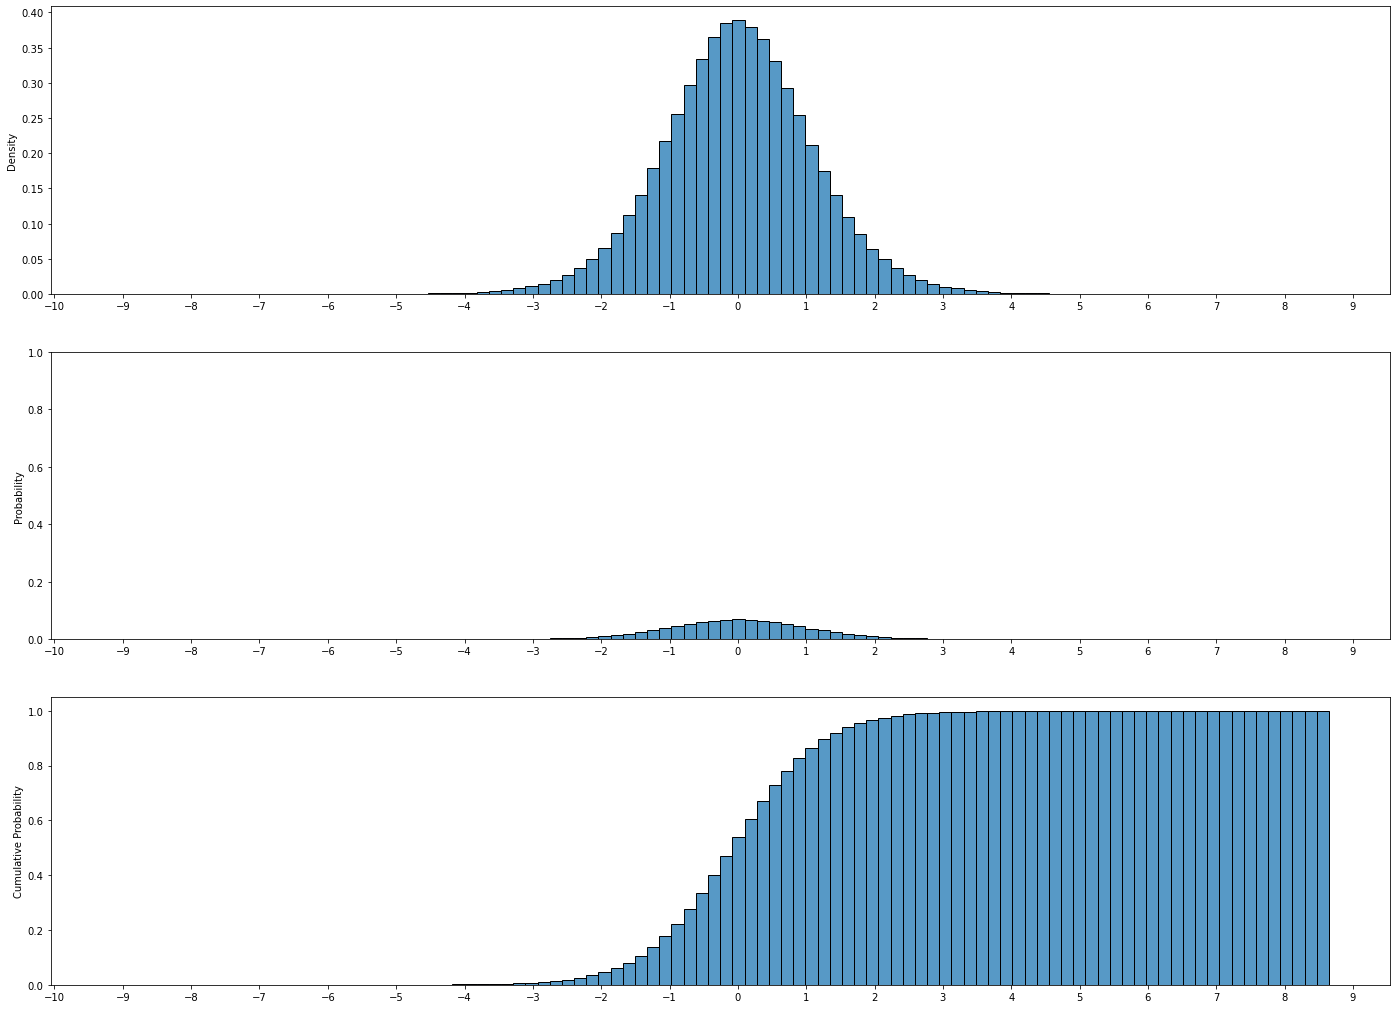

In [11]:
sample_from_t(df=10, sample_size=10**6)

### t-test 1: sample mean vs. constant

The first application that we will consider is a case when we need to test whether a sample mean differs significantly from some particular constant or not. 

The following function uses the `t` distribution from `scipy.stats` to perform the t-test. Let's study it:

In [12]:
from scipy.stats import t

def constant_ttest(data, constant, alternative='two-sided'):
    # - sample size
    n = len(data)
    # - sample mean
    x_mean = np.mean(data)
    # - sample standard deviation
    s = np.std(data, ddof=1)
    # - test statistic
    t_statistic = (x_mean - constant) / (s / np.sqrt(n))
    # - degrees of freedom
    df = n - 1
    # - decision making
    if alternative == 'two-sided':
        p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))
    elif alternative == 'less':
        p_value = t.cdf(t_statistic, df)
    elif alternative == 'greater':
        p_value = 1 - t.cdf(t_statistic, df)
    else:
        raise ValueError("Invalid alternative hypothesis")
    return t_statistic, df, p_value

Let's test `constant_ttest()`

In [13]:
from scipy.stats import norm

emp_data = norm.rvs(loc=4, scale=2, size=1000)
target = 3
res = constant_ttest(data = emp_data, constant = target, alternative='two-sided')

print(f't-value={res[0]}')
print(f'd.f.={res[1]}')
print(f'p={res[2]}')

t-value=14.492550325393998
d.f.=999
p=0.0


And what if we increase the standard devation of our sample?

In [14]:
emp_data = norm.rvs(loc=4, scale=8, size=1000)
target = 3
res = constant_ttest(data = emp_data, constant = target, alternative='two-sided')

print(f't-value={res[0]}')
print(f'd.f.={res[1]}')
print(f'p={res[2]}')

t-value=3.596912198498132
d.f.=999
p=0.00033778749161439414


In [15]:
emp_data = norm.rvs(loc=4, scale=18, size=1000)
target = 3
res = constant_ttest(data = emp_data, constant = target, alternative='two-sided')

print(f't-value={res[0]}')
print(f'd.f.={res[1]}')
print(f'p={res[2]}')

t-value=1.8371008400249038
d.f.=999
p=0.06649192064226961


### t-test 2: two sample means, t-test for independent measures

The t-test for **independent measures** is used when the two groups being compared are independent of each other, **meaning that the individuals in one group have no relationship to the individuals in the other group**. This is often the case when two different populations are being compared or when two different treatments are being compared. For example, if we want to compare the heights of men and women, we would use a t-test for independent measures because the individuals in the two groups (men and women) are independent of each other. Similarly, if we want to compare the effectiveness of two different medications, we would use a t-test for independent measures because the individuals in each treatment group are independent of each other.

The formula for the t-test with independent measures is given by:

$$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

where $\bar{x}_1$ and $\bar{x}_2$ are the sample means of the two independent samples, $n_1$ and $n_2$ are the sizes of the two independent samples, $s_p$ is the **pooled standard deviation** calculated as:

$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$

where $s_1^2$ and $s_2^2$ are the sample variances of the two independent samples, and $t$ is the t-statistic.

Python:

In [16]:
def independent_ttest(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must be of same size.")
    # size of data
    n1 = n2 = len(x)
    # degrees of freedom
    df = n1 + n2 - 2
    # s1 variance
    s1 = np.var(x, ddof=1)
    # s2 variance
    s2 = np.var(y, ddof=1)
    # pooled standard deviation
    sp = np.sqrt(((n1-1)*s1 + (n2-1)*s2) / df)
    # t-statistic
    t_stat = (np.mean(x) - np.mean(y)) / (sp * np.sqrt(1/n1 + 1/n2))
    # two-tailed p-value
    p_value = 2 * (1 - t.cdf(abs(t_stat), df))
    # output
    return t_stat, df, p_value

In [17]:
sample1 = norm.rvs(loc=5, scale=1.2, size=1000)
sample2 = norm.rvs(loc=4, scale=1.2, size=1000)

res = independent_ttest(x=sample1, y=sample2)

print(f't-value={res[0]}')
print(f'd.f.={res[1]}')
print(f'p={res[2]}')

t-value=20.00328769762266
d.f.=1998
p=0.0


And what if we make the difference between the sample means smaller?

In [18]:
sample1 = norm.rvs(loc=4.1, scale=1.2, size=1000)
sample2 = norm.rvs(loc=4.2, scale=1.2, size=1000)

res = independent_ttest(x=sample1, y=sample2)

print(f't-value={res[0]}')
print(f'd.f.={res[1]}')
print(f'p={res[2]}')

t-value=-2.3352732333124613
d.f.=1998
p=0.01962767793608622


### t-test 3: two sample means, t-test for dependent measures

The t-test for **dependent measures**, also known as the **paired t-test**, is used when the two groups being compared are dependent on each other, meaning that the individuals in one group are related to the individuals in the other group in some way. This is often the case when the same individuals are measured twice, once before and once after some treatment or intervention. For example, if we want to determine whether a new exercise program has an effect on weight loss, we would use a t-test for dependent measures because we are measuring the same individuals before and after the exercise program.

Another example of when to use a t-test for dependent measures is when we want to compare the performance of a group of students on a pre-test and a post-test. In this case, we would use a t-test for dependent measures because the same students are being measured twice, and their performance on the post-test is dependent on their performance on the pre-test.

The mathematical expression for the t-test for dependent measures; Let $x_1$ and $x_2$ be the two paired samples:

$$t = \frac{\bar{d}}{s_d/\sqrt{n}}$$

where:

- $t$: the t-statistic
- $\bar{d}$: the mean of the differences between the paired samples, which is calculated as $\bar{d} = \frac{1}{n}\sum_{i=1}^{n}(x_{2,i}-x_{1,i})$
- $s_d$: the standard deviation of the differences between the paired samples, which is calculated as $s_d = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_{2,i}-x_{1,i}-\bar{d})^2}$
- $n$: the number of paired samples.

Python:

In [19]:
def dependent_ttest(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must be of same size.")
    # differences between the paired samples
    diffs = x - y 
    # the mean difference and standard deviation of the differences
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, ddof=1)    
    # Calculate the t-statistic
    n = len(x)
    t_stat = mean_diff / (std_diff / np.sqrt(n))
    # degrees of freedom
    df=n-1    
    # the two-tailed p-value
    p_val = 2 * (1 - t.cdf(abs(t_stat), df))
    # output
    return t_stat, df, p_val

In [20]:
sample1 = norm.rvs(loc=4.1, scale=1.2, size=1000)
sample2 = norm.rvs(loc=4.2, scale=1.2, size=1000)

res = dependent_ttest(x=sample1, y=sample2)

print(f't-value={res[0]}')
print(f'd.f.={res[1]}')
print(f'p={res[2]}')

t-value=-2.304023121163921
d.f.=999
p=0.021425817476500963


In [21]:
sample1 = norm.rvs(loc=6.3, scale=2.7, size=1000)
sample2 = norm.rvs(loc=4.2, scale=1.2, size=1000)

res = dependent_ttest(x=sample1, y=sample2)

print(f't-value={res[0]}')
print(f'd.f.={res[1]}')
print(f'p={res[2]}')

t-value=20.961724511417366
d.f.=999
p=0.0


### t-tests w/o pain w. Scipy

Sample mean vs. constant

In [22]:
from scipy.stats import ttest_1samp

# Generate a random data vector
emp_data = norm.rvs(loc=4, scale=2, size=1000)

# Perform a one-sample t-test against a constant value of 4
t_stat, p_val = ttest_1samp(emp_data, popmean=4)

# report
print(f"t-statistic: {t_stat}, p-value: {p_val}")

t-statistic: 1.031270765857945, p-value: 0.302663463543826


Two sample means, independent measures

In [23]:
from scipy.stats import ttest_ind

sample1 = norm.rvs(loc=7.3, scale=.6, size=1000)
sample2 = norm.rvs(loc=2.2, scale=.6, size=1000)

t_stat, p_val = ttest_ind(sample1, sample2)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

t-statistic: 192.6014290127593, p-value: 0.0


Two sample means, dependent measures

In [24]:
from scipy.stats import ttest_rel

sample1 = norm.rvs(loc=4.2, scale=1.2, size=1000)
sample2 = norm.rvs(loc=4.75, scale=1.2, size=1000)

t_stat, p_val = ttest_rel(sample1, sample2)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

t-statistic: -9.484198377439112, p-value: 1.7232647387353876e-20


### Assumptions

**N.B. The Assumptions of t-test:**

- **Normality:** The data are normally distributed within each group.
- **Independence:** The observations in each group are independent of each other.
- **Equality of variances:** The variances of the populations from which the two groups are sampled are equal.
- **Random Sampling:** The data are collected using a random sampling method.
- **Interval or ratio data:** The data are measured on an interval or ratio scale.

***

## 3. The Central Limit Theorem

### The world as we know it... 

The Central Limit Theorem (CLT) is a theorem that describes the behavior of the means of a large number of $IID$ random variables. It states that, **regardless of the distribution of the underlying random variables**, the sample means will tend to be normally distributed *as the sample size becomes larger*.

The CLT states that, if we have a large number of independent and identically distributed random variables, $X_1, X_2, ...,X_n$, each with a finite mean $\mu$ and finite variance $\sigma^2$, then the sample mean, $\bar{X}$, is approximately normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$, as $n$ approaches infinity.

This means that, as long as the sample size is large enough, we can use the normal distribution to make inferences about the population mean, even if the underlying population is not normally distributed.

In [25]:
# number of samples
n_samples = 10000
# number of iid random variables in each sample  
n_iid = 50
# degrees of freedom of chi-square distribution
df = 5 

# Simulate n_samples of n_iid chi-square random variables
samples = chi2.rvs(df, size=(n_samples, n_iid))
print(samples.shape)
samples

(10000, 50)


array([[ 1.6264408 ,  5.05086906,  3.37055808, ...,  8.02062724,
         2.27907543,  6.89516811],
       [ 3.81554128,  4.17306738,  6.22146562, ...,  2.37055549,
         4.68102039,  2.58211784],
       [ 7.93615121,  5.84849979, 15.78111421, ...,  6.04117864,
         6.81258906,  6.87742612],
       ...,
       [ 6.69615665,  3.34274008,  5.53968052, ...,  2.62474852,
         1.57880713,  1.15735679],
       [10.64803136,  5.6251204 ,  4.15735578, ...,  5.21786258,
         8.55059819,  8.03759762],
       [ 4.64910081,  7.4484069 ,  3.49625803, ...,  2.81747791,
         3.74491767,  5.24333186]])

In [26]:
# sample means
sample_means = np.mean(samples, axis=1)
sample_means

array([5.10722945, 4.29976848, 5.37854846, ..., 5.16720594, 4.87543764,
       4.37862977])

In [27]:
np.mean(sample_means)

5.006220640736698

In [28]:
# sample variance
sample_var = np.var(samples, axis=1)
sample_var

array([9.75482603, 5.64356321, 9.55156739, ..., 9.75922727, 9.41518889,
       4.50257636])

In [29]:
np.mean(sample_var)

9.827040130234113

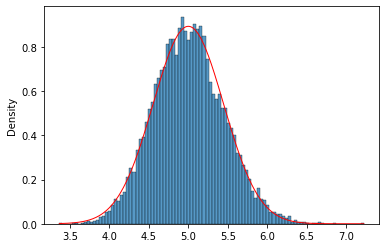

In [30]:
# plot histogram of sample means and normal distribution
sns.histplot(x=sample_means, bins=100, stat='density')
# theoretical normal distribution
x = np.linspace(np.min(sample_means), np.max(sample_means), 1000)
t_mean = df
t_sd = np.sqrt(2*df)/np.sqrt(n_iid)
pdf = norm.pdf(x, loc=t_mean, scale=t_sd)
# Plot normal distribution
plt.plot(x, pdf, 'r', linewidth=1)
# Show plot
plt.show()

Repeat w. `n_samples=1e6`

In [31]:
# number of samples
n_samples = 1000000
# number of iid random variables in each sample  
n_iid = 50
# degrees of freedom of chi-square distribution
df = 5 
# Simulate n_samples of n_iid chi-square random variables
samples = chi2.rvs(df, size=(n_samples, n_iid))
# sample means
sample_means = np.mean(samples, axis=1)
# sample variance
sample_var = np.var(samples, axis=1)
# plot histogram of sample means and normal distribution
sns.histplot(x=sample_means, bins=100, stat='density')
# theoretical normal distribution
x = np.linspace(np.min(sample_means), np.max(sample_means), 1000)
t_mean = df
t_sd = np.sqrt(2*df)/np.sqrt(n_iid)
pdf = norm.pdf(x, loc=t_mean, scale=t_sd)
# Plot normal distribution
plt.plot(x, pdf, 'r', linewidth=1)
# Show plot
plt.show()

MemoryError: Unable to allocate 381. MiB for an array with shape (1000000, 50) and data type float64

### The Misty Domain of Heavy-Tailed Distributions...

There is this thing called the [Cauchy Distribution](https://en.wikipedia.org/wiki/Cauchy_distribution) that bothers me... the devil in question has the following pdf:

$$f(x) = \frac{1}{\pi \gamma \left[1 + \left(\frac{x-x_0}{\gamma}\right)^2\right]}$$

where

- the location parameter, $x_0$, is the value around which the distribution is centered, i.e., it specifies the location of the peak of the distribution, and 
- the scale parameter, $\gamma$, controls the width of the distribution, i.e. determines the degree of spread of the distribution.

The Cauchy distribution **does not have a finite variance**, and **its tails decay more slowly than the tails of the Normal distribution**. This makes the Cauchy distribution an example of a distribution with infinite variance, also known as a "heavy-tailed" or "fat-tailed" distribution. The heavy tails of the Cauchy distribution make it prone to generating extreme values, which can lead to some statistical issues, such as non-convergence of the mean and high sensitivity to outliers.

In [ ]:
from scipy.stats import cauchy

# number of iid random variables in each sample  
n_iid = 50
# x_0 in each sample
x_0 = 0
# gamma in each sample
gamma = .5

# figure
fig, ax = plt.subplots(2, 2, figsize=(24, 18))

# Simulate n_samples of n_iid Cauchy random variables
n_samples1 = 1000
samples = cauchy.rvs(loc=x_0, scale=gamma, size=(n_samples, n_iid))
sample_means1 = np.mean(samples, axis=1)
n_samples2 = 10000
samples = cauchy.rvs(loc=x_0, scale=gamma, size=(n_samples, n_iid))
sample_means2 = np.mean(samples, axis=1)
n_samples3 = 1000000
samples = cauchy.rvs(loc=x_0, scale=gamma, size=(n_samples, n_iid))
sample_means3 = np.mean(samples, axis=1)
n_samples4 = 10000000
samples = cauchy.rvs(loc=x_0, scale=gamma, size=(n_samples, n_iid))
sample_means4 = np.mean(samples, axis=1)
     
sns.histplot(ax=ax[0,0], x=sample_means1, bins=100, stat='density').set(title="Num.samples="+str(n_samples1));
sns.histplot(ax=ax[0,1], x=sample_means2, bins=100, stat='density').set(title="Num.samples="+str(n_samples2));
sns.histplot(ax=ax[1,0], x=sample_means3, bins=100, stat='density').set(title="Num.samples="+str(n_samples3));
sns.histplot(ax=ax[1,1], x=sample_means4, bins=100, stat='density').set(title="Num.samples="+str(n_samples4));

External sources on Cauchy Distribution:

"The Cauchy distribution is often used in statistics as the canonical example of a "pathological" distribution **since both its expected value and its variance are undefined**." 

"A function with the form of the density function of the Cauchy distribution was studied geometrically by Fermat in 1659, and later was known as the [witch of Agnesi](https://en.wikipedia.org/wiki/Witch_of_Agnesi), after [Agnesi](https://en.wikipedia.org/wiki/Maria_Gaetana_Agnesi) included it as an example in her 1748 calculus textbook. Despite its name, the first explicit analysis of the properties of the Cauchy distribution was published by the French mathematician Poisson in 1824, with Cauchy only becoming associated with it during an academic controversy in 1853."

(from [Cauchy Distribution, English Wikipedia](https://en.wikipedia.org/wiki/Cauchy_distribution), our emphasis).

**ChatGPT (gpt-3.5-turbo):**

```
USER: Does Central Limit Theorem hold for Cauchy Distribution?

SYSTEM: No, the Central Limit Theorem (CLT) does not hold for Cauchy distribution.

The Central Limit Theorem states that, under certain conditions, the sum of a large number of independent and identically distributed (i.i.d) random variables approaches a normal distribution. However, the Cauchy distribution does not satisfy the conditions required for the CLT to hold. Specifically, the Cauchy distribution does not have a finite mean or variance, which are required conditions for the CLT.

The Cauchy distribution has heavy tails, meaning that it has a higher probability of producing extreme values compared to a normal distribution. As a result, the sum of a large number of Cauchy-distributed random variables does not converge to a normal distribution. This is known as the Cauchy principal value and is a fundamental property of the Cauchy distribution.

Therefore, when dealing with Cauchy distribution, one cannot rely on the Central Limit Theorem to approximate the distribution of the sum of random variables.
```

***

## 4. Covariance and Correlation

### Covariance

Given two random variables (RVs), $X$ and $Y$, their (sample) covariance is given by:

$$cov(X,Y) = E[(X-E[X])(Y-E[Y])] = \frac{(X-\bar{X})(Y-\bar{Y})}{N-1}$$

where $E[X]$ denotes the *expectation* (the *mean*, if you prefer) of $X$, $\bar{X}$ is the mean of $X$, $\bar{Y}$ is the mean of $Y$, and $N$ is the sample size.


**Some properties of covariance.**

**Bilinearity.** Covariance is a bilinear function, meaning that it is linear in each argument separately. That is, for any constants a and b, we have:

$$cov(aX+b, Y) = acov(X,Y) + bcov(Y,Y)$$

and

$$cov(X, aY+b) = acov(X,Y) + bcov(X,X)$$

**Symmetry.** Covariance is a symmetric measure, meaning that the covariance between X and Y is the same as the covariance between Y and X. That is:

$$cov(X,Y) = cov(Y,X)$$

**Independence.** If X and Y are independent random variables, then their covariance is zero. That is:

$$cov(X,Y) = E[(X-\bar{X})(Y-\bar{Y})] = E[X-\bar{X}]E[Y-\bar{Y}] = 0$$

The **covariance of a variable with itself is equal to its variance**.

Python:

In [32]:
def covariance(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must be of same size.")
    # the means of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)    
    # the deviations of x and y from their means
    x_dev = x - x_mean
    y_dev = y - y_mean
    # the covariance of x and y
    cov = np.mean(x_dev * y_dev)
    # ouput
    return cov

In [33]:
sample1 = norm.rvs(loc=1.7, scale=.6, size=1000)
sample2 = norm.rvs(loc=2.85, scale=.6, size=1000)
covariance(sample1, sample2)

-8.734967627752232e-05

<AxesSubplot:xlabel='x', ylabel='y'>

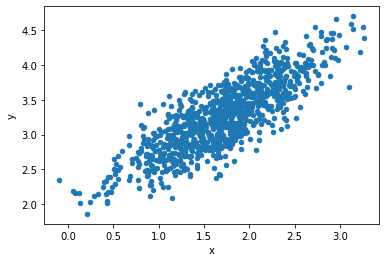

In [34]:
sample1 = norm.rvs(loc=1.7, scale=.6, size=1000)
# linear scaling of sample1
a, b = .75, 2
sample2 = a*sample1+b
# add random noise to sample2
eps = norm.rvs(loc=0, scale=.27, size=1000)
sample2 = sample2 + eps
samples = pd.DataFrame({'x':sample1, 'y':sample2})
samples.plot.scatter(x='x', y='y')

In [35]:
covariance(samples['x'], samples['y'])

0.2301518163879275

### Correlation

**Pearson's coefficient of correlation** is nothing else than a covariance between $X$ and $Y$ upon their *standardization*. The standardization of a RV - widely known as a variable *z-score* - is obtained upon subtracting all of its values from the mean, and dividing by the standard deviation; for the **i**-th observation of $X$

$$z(x_i) = \frac{x_i-\bar{X}}{\sigma}$$

Python:

In [36]:
def z_score(x):
    # the mean and standard deviation of x
    x_mean = np.mean(x)
    x_std = np.std(x)    
    # the z-score of x
    z = (x - x_mean) / x_std
    # output
    return z

In [37]:
samples['x_z'] = z_score(samples['x'])
samples['y_z'] = z_score(samples['y'])
samples

,x,y,x_z,y_z
0,0.056516,2.182590,-2.953191,-2.182381
1,1.332869,3.032078,-0.663188,-0.471489
2,2.096507,3.673153,0.706912,0.819654
3,1.137318,2.994168,-1.014041,-0.547840
4,1.987253,3.456681,0.510892,0.383673
...,...,...,...,...
995,1.709401,3.103138,0.012376,-0.328372
996,2.357064,3.528546,1.174397,0.528411
997,1.444105,3.336465,-0.463612,0.141555
998,1.360171,2.992567,-0.614205,-0.551064


In [38]:
print(np.mean(samples['x_z']))
print(np.std(samples['x_z'], ddof=1))
print(np.mean(samples['y_z']))
print(np.std(samples['y_z'], ddof=1))

2.3865354137342364e-15
1.0005003753127737
-3.6530778402266155e-15
1.0005003753127746


In [39]:
covariance(samples['x_z'], samples['y_z'])

0.8316581004488661

In [40]:
from scipy.stats import pearsonr
pearsonr(samples['x_z'], samples['y_z'])

(0.8316581004488667, 3.2464470445803922e-257)

Right. There are many formulas that compute `r`, the correlation coefficient; however, understanding that is simply the covariance of standardized RVs is essential. Once you know to standardize the variables and how to compute covariance (and that is easy), you don't need to care about expressions like:

$$r_{XY} = \frac{N\sum{XY}-(\sum{X})(\sum{Y})}{\sqrt{[N\sum{X^2}-(\sum{X})^2][N\sum{Y^2}-(\sum{Y})^2]}}$$

This and similar expressions are good, and especially for two purposes: first, they will compute the desired value of the correlation coefficient in the end, that's for sure, and second, writing them up in really helps mastering $\LaTeX$. Besides these roles they play, there is really nothing essentially important in relation to them.

Somewhat easier to remember:

$$r_{XY} = \frac{cov(X,Y)}{\sigma(X)\sigma(Y)}$$

i.e. correlation is the covariance of $X$ and $Y$, divided by the product of their standard deviations.

### Further Reading:

[https://www.khanacademy.org/math/statistics-probability/probability-library](https://www.khanacademy.org/math/statistics-probability/probability-library)

[Random variables | Statistics and probability | Math | Khan Academy]( https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library)

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>